In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/616228_PFE_2023-10-25_16h40.24.196.csv")

In [35]:
df.head(2)

,videos,trials.thisRepN,trials.thisTrialN,trials.thisN,trials.thisIndex,thisRow.t,notes,trial.started,movie.started,etRecord.started,...,mouse.rightButton,mouse.time,participant,session,date,expName,psychopyVersion,frameRate,expStart,Unnamed: 26
0,Video/ball-swept_volume.avi,0,0,0,3,0.138757,NaN,0.03202,0.138757,0.071261,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.00031930021941661835, 0.02592690009623766, ...",616228,1,2023-10-25_16h40.24.196,PFE,2023.2.3,59.9009,2023-10-25 16h40.29.013618 +0200,NaN
1,Video/spot-elongated-2.avi,0,1,1,5,1.742225,NaN,1.46762,1.742225,0.230965,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0001829999964684248, 0.0022456999868154526,...",616228,1,2023-10-25_16h40.24.196,PFE,2023.2.3,59.9009,2023-10-25 16h40.29.013618 +0200,NaN


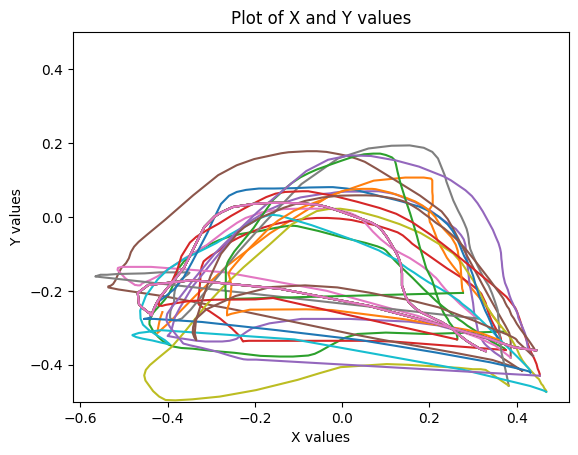

In [36]:
for count, video in enumerate(df):
    try:
        x = df.at[count-1,"mouse.x"]
        y = df.at[count-1,"mouse.y"]
        x = eval(x)
        y = eval(y)
    except:
        pass
    
    plt.plot(x,y)
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('Plot of X and Y values')
    plt.ylim(-0.5, 0.5)

In [37]:
print(x)

[0.4444444444444444, 0.39444444444444443, 0.3685185185185185, 0.3351851851851852, 0.2212962962962963, 0.06111111111111111, -0.1425925925925926, -0.34444444444444444, -0.4444444444444444, -0.4685185185185185, -0.46574074074074073, -0.4601851851851852, -0.4444444444444444, -0.44166666666666665, -0.44074074074074077, -0.44074074074074077, -0.44074074074074077, -0.4388888888888889, -0.43796296296296294, -0.43703703703703706, -0.4361111111111111, -0.4361111111111111, -0.4351851851851852, -0.42592592592592593, -0.4148148148148148, -0.4, -0.3814814814814815, -0.36203703703703705, -0.34629629629629627, -0.33055555555555555, -0.31574074074074077, -0.29259259259259257, -0.2777777777777778, -0.25925925925925924, -0.25, -0.2037037037037037, -0.1648148148148148, -0.12685185185185185, -0.08703703703703704, -0.05925925925925926, -0.040740740740740744, -0.025, -0.008333333333333333, 0.013888888888888888, 0.04259259259259259, 0.06574074074074074, 0.0787037037037037, 0.08796296296296297, 0.1009259259259

In [38]:


plt.show()
